Problem Statement: Decision Tree Using the CART Algorithm

You are given a dataset,“car_evaluation.csv.”Load the dataset into a DataFrame without the header and rename the columns as the list given here -['buying',  'maint',  'doors',  'persons',  'lug_boot', 'safety',  'class']. Considering  the classcolumn  as  the  target variable, perform the following tasks:

1.Explore the target column,class(our task is to predict how the car features  affectthe  class  of  car  asVery  good,  Good,  Acceptable,  or  Unacceptable, whichis why we have considered this column as the target column)

2.Declare feature vectors and the target variable

3.Split the data into test and train fragments using the train_test_split()function in an 80:20 ratio (80% trainand20% test)

4.Encode all     the     ordinal     data     into     numeric     values     using     the category_encoderslibrary

5.Predicting the test results using a Decision Tree Classifier based on Gini Index criteria

6.Check the accuracy score of the model based on the Gini Index

7.Visualize the decision tree using Graphviz

8.Show how the importance of features affects the target variable


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline

**1.Explore the target column,class(our task is to predict how the car features  affectthe  class  of  car  asVery  good,  Good,  Acceptable,  or  Unacceptable, whichis why we have considered this column as the target column)**

In [ ]:

column_names = ['buying', 'maintaince', 'doors', 'persons', 'lugage_capacity', 'safety', 'class']
df = pd.read_csv("car_evaluation.csv", header=None, names=column_names)

df.head()


,buying,maintaince,doors,persons,lugage_capacity,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.size

12096

In [ ]:
df.shape

(1728, 7)

**3.Split the data into test and train fragments using the train_test_split()function in an 80:20 ratio (80% trainand20% test)**


In [ ]:
x=df.drop(['class'],axis=1)
y=df['class']


In [ ]:
df.isnull().sum()

buying             0
maintaince         0
doors              0
persons            0
lugage_capacity    0
safety             0
class              0
dtype: int64

**2.Declare feature vectors and the target variable**

In [ ]:
class_counts = df['class'].value_counts()
print('Frequency of ordinal data in the target -n\n',class_counts)

Frequency of ordinal data in the target -n
 unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
print("Target Column is:\n",pd.DataFrame(y.head()))

Target Column is:
    class
0  unacc
1  unacc
2  unacc
3  unacc
4  unacc


In [ ]:
display("feature vectors are: ",x.head())

'feature vectors are: '

,buying,maintaince,doors,persons,lugage_capacity,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(1382, 6)

**Encode the all the ordinal data into numeric values using the category_encoders library**

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maintaince', 'doors', 'persons', 'lugage_capacity', 'safety'])
X_train = encoder.fit_transform(x_train)
X_test=encoder.transform(x_test)
X_train.head()

,buying,maintaince,doors,persons,lugage_capacity,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


**5.Predicting the test results using a Decision Tree Classifier based on Gini Index criteria**

In [ ]:
clf_dt=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3,random_state=0)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred=clf_dt.predict(X_test)
y_pred

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc

**6.Check the accuracy score of the model based on the Gini Index**

In [ ]:
pred = clf_dt.predict(X_test)
print('Accuracy is:',accuracy_score(y_test,pred))

Accuracy is: 0.8179190751445087


**7.Visualize the decision tree using Graphviz**

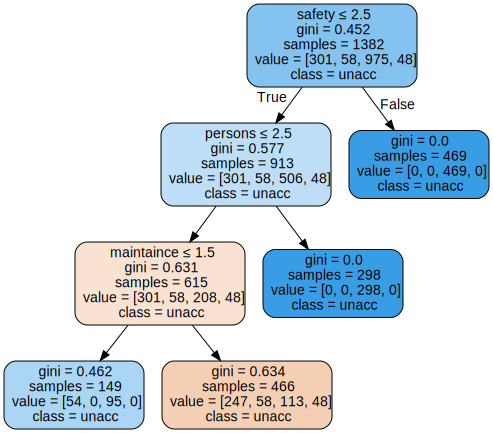

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

**8.Show how the importance of features affects the target variable**


In [ ]:
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(clf_dt.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)

In [ ]:
features

,Features,Importance
3,persons,0.534
5,safety,0.374
1,maintaince,0.091
0,buying,0.000
2,doors,0.000
4,lugage_capacity,0.000
